In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [2]:
x = np.random.randn(100, 2)
y = x[:, 0] * 2 + x[:, 1] * 3 + np.random.randn(100) * 0.1

**Mathematical Formulation:**
- `θ_new = θ_old - α * ∇J(θ)`
- Where `α` is learning rate and `∇J(θ)` is the gradient

**Batch Gradient Descent**

In [3]:
# Uses all training data for each update
def batch_gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    weights = np.random.randn(x.shape[1])
    losses = []
    
    for epoch in range(epochs):
        predictions = x @ weights
        error = predictions - y
        loss = np.mean(error ** 2)
        losses.append(loss)
        
        gradient = x.T @ error / len(x)
        weights -= learning_rate * gradient
        
    return weights, losses

**Stochastic Gradient Descent**

In [4]:
# Uses one sample at a time
def sgd(x, y, learning_rate=0.01, epochs=100):
    weights = np.random.randn(x.shape[1])
    losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        indices = np.random.permutation(len(x))
        
        for i in indices:
            prediction = x[i] @ weights
            error = prediction - y[i]
            epoch_loss += error ** 2
            gradient = x[i] * error
            weights -= learning_rate * gradient
            
        losses.append(epoch_loss / len(x))
        
    return weights, losses

**Mini-batch Gradient Descent**

In [10]:
# Uses small batches (most common)
def mini_batch_gd(x, y, batch_size=32, learning_rate=0.01, epochs=100):
    weights = np.random.randn(x.shape[1])
    losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        indices = np.random.permutation(len(x))
        
        for i in range(0, len(x), batch_size):
            batch_indices = indices[i:i+batch_size]
            batch_x = x[batch_indices]
            batch_y = y[batch_indices]
            
            predictions = batch_x @ weights
            error = predictions - batch_y
            batch_error = np.mean(error ** 2)
            epoch_loss += batch_error
            
            gradient = batch_x.T @ error / len(batch_x)
            weights -= learning_rate * gradient
        
        losses.append(epoch_loss / (len(x) // batch_size))
    
    return weights, losses

In [11]:
weights_batch, losses_batch = batch_gradient_descent(x, y, epochs=50)
weights_sgd, losses_sgd = sgd(x, y, epochs=50)
weights_mini, losses_mini = mini_batch_gd(x, y, batch_size=32, epochs=50)

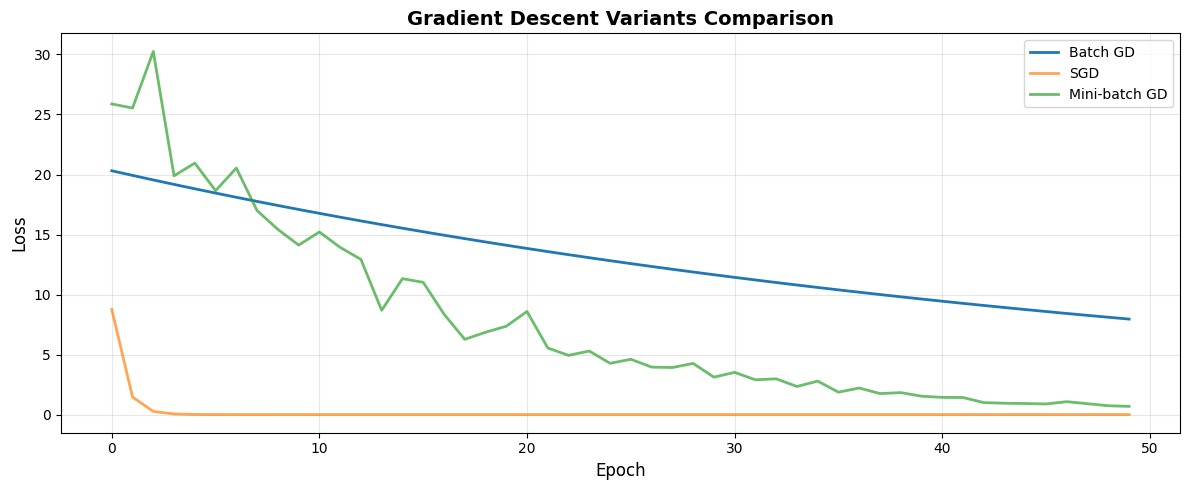

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(losses_batch, label='Batch GD', linewidth=2)
plt.plot(losses_sgd, label='SGD', linewidth=2, alpha=0.7)
plt.plot(losses_mini, label='Mini-batch GD', linewidth=2, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Gradient Descent Variants Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
print("Final Losses:")
print(f"  Batch GD: {losses_batch[-1]:.6f}")
print(f"  SGD: {losses_sgd[-1]:.6f}")
print(f"  Mini-batch GD: {losses_mini[-1]:.6f}")

Final Losses:
  Batch GD: 7.962075
  SGD: 0.011377
  Mini-batch GD: 0.692492
